# 1. 데이터 가져오기
- 터미널`~/data/data/bike-sharing-demand`경로에 `train.csv`데이터를 train 변수로 가져옵니다
- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
import pandas as pd

# train 데이터셋 불러오기
df_train = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2. `datetime`컬럼을 `datetime`자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- `to_datetime`활용: [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [2]:
# object로 되어있는 'datetime'항목을 datetime으로 변환
s_datetime = pd.to_datetime(df_train['datetime'])

# 년, 월, 일, 시, 분, 초 별로 각 열에 할당
df_train['year'] = s_datetime.map(lambda dt: dt.year)
df_train['month'] = s_datetime.map(lambda dt: dt.month)
df_train['day'] = s_datetime.map(lambda dt: dt.day)
df_train['hour'] = s_datetime.map(lambda dt: dt.hour)
df_train['minute'] = s_datetime.map(lambda dt: dt.minute)
df_train['second'] = s_datetime.map(lambda dt: dt.second)

In [3]:
# 추가한 열 확인
df_train[['year', 'month', 'day', 'hour', 'minute', 'second']]

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0
...,...,...,...,...,...,...
10881,2012,12,19,19,0,0
10882,2012,12,19,20,0,0
10883,2012,12,19,21,0,0
10884,2012,12,19,22,0,0


# 3. `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기
- `sns.countplot`활용해서 시각화하기
- `subplot`을 활용해서 한 번에 6개의 그래프 함께 시각화하기

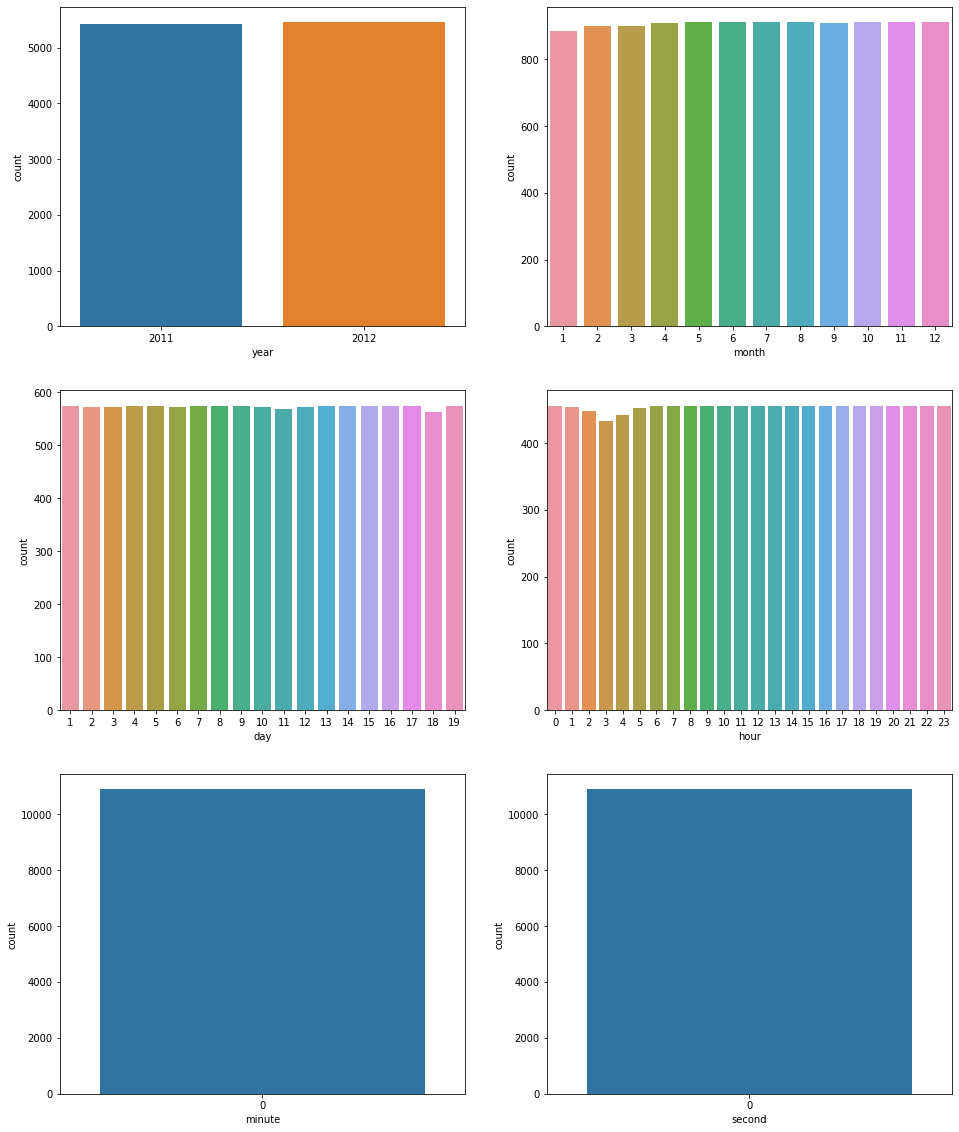

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 이미지 크기 지정
_ = plt.subplots(figsize=(16, 20))

# 항목별 그래프가 그려질 공간
axes = [plt.subplot(3, 2, i) for i in range(1, 7)]

# 그래프로 그려질 항목
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 항목별 counterplot 그리기
for i in range(6):
    sns.countplot(x=df_train[cols[i]], ax=axes[i])
    axes[i].set_xlabel(cols[i])

plt.show()

# 4. `x`, `y` 컬럼 선택 및 train/test 데이터 분리
- `X`(feature)에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
- `count`값을 맞추고자 하므로, `y`변수에 `count`컬럼의 데이터 넣기

In [5]:
# train 데이터셋의 속성 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  minute      10886 non-null  int64  
 17  second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB


In [6]:
# 실제로 holiday와 workingday가 배타적 관계가 아님을 확인
(df_train['holiday'] != df_train['workingday']).all()

False

In [7]:
# 제외한 이유
# datetime: 이미 다른 항목에 구분해 저장
# atemp: temp와 windspeed로 구할 수 있다
# minute, second: 값이 한 종류밖에 없다
# count: 정답 데이터
# casual, registered: 정답 데이터인 count의 세부 항목 (count = casual + registered)
X_cols = ['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

In [8]:
# 입력 데이터와 정답 데이터를 numpy array로 저장
X = df_train[X_cols].values
y = df_train['count'].values

In [9]:
# 입력 데이터와 정답 데이터 타입과 형태 확인
print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (10886, 10)
<class 'numpy.ndarray'> (10886,)


# 5. LinearRegression 모델 학습
- `sklearn`의 `LinearRegression`모델 불러오기 및 학습하기

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터셋을 train용과 test용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) # train 데이터셋 형태 확인
print(X_test.shape, y_test.shape)   # test 데이터셋 형태 확인

(8708, 10) (8708,)
(2178, 10) (2178,)


In [11]:
model = LinearRegression()  # 모델 불러오기
model.fit(X_train, y_train) # 모델 학습

LinearRegression()

# 6. 학습된 모델로 `X_test`에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 `X_test`를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [12]:
from sklearn.metrics import mean_squared_error

# 학습한 모델로 test 데이터셋 추론
y_test_pred = model.predict(X_test)
print(y_test_pred)

[242.13770388  46.45494126 205.6465447  ... 306.21474675  41.57450981
 241.66462584]


In [13]:
# test 데이터셋에 대한 Loss 값(MSE, RMSE) 계산
mse = mean_squared_error(y_test_pred, y_test)
rmse = mse ** 0.5

print("mse:", mse, "rmse:", rmse)

mse: 19964.842485786136 rmse: 141.29700097944803


# 7. x축은 `temp` 또는 `humidity`로, y축은 `count`로 예측 결과 시각화하기
- x축에 X 데이터 중 `temp` 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 `humidity` 데이터를, y축에는 count 데이터를 넣어서 시각화하기

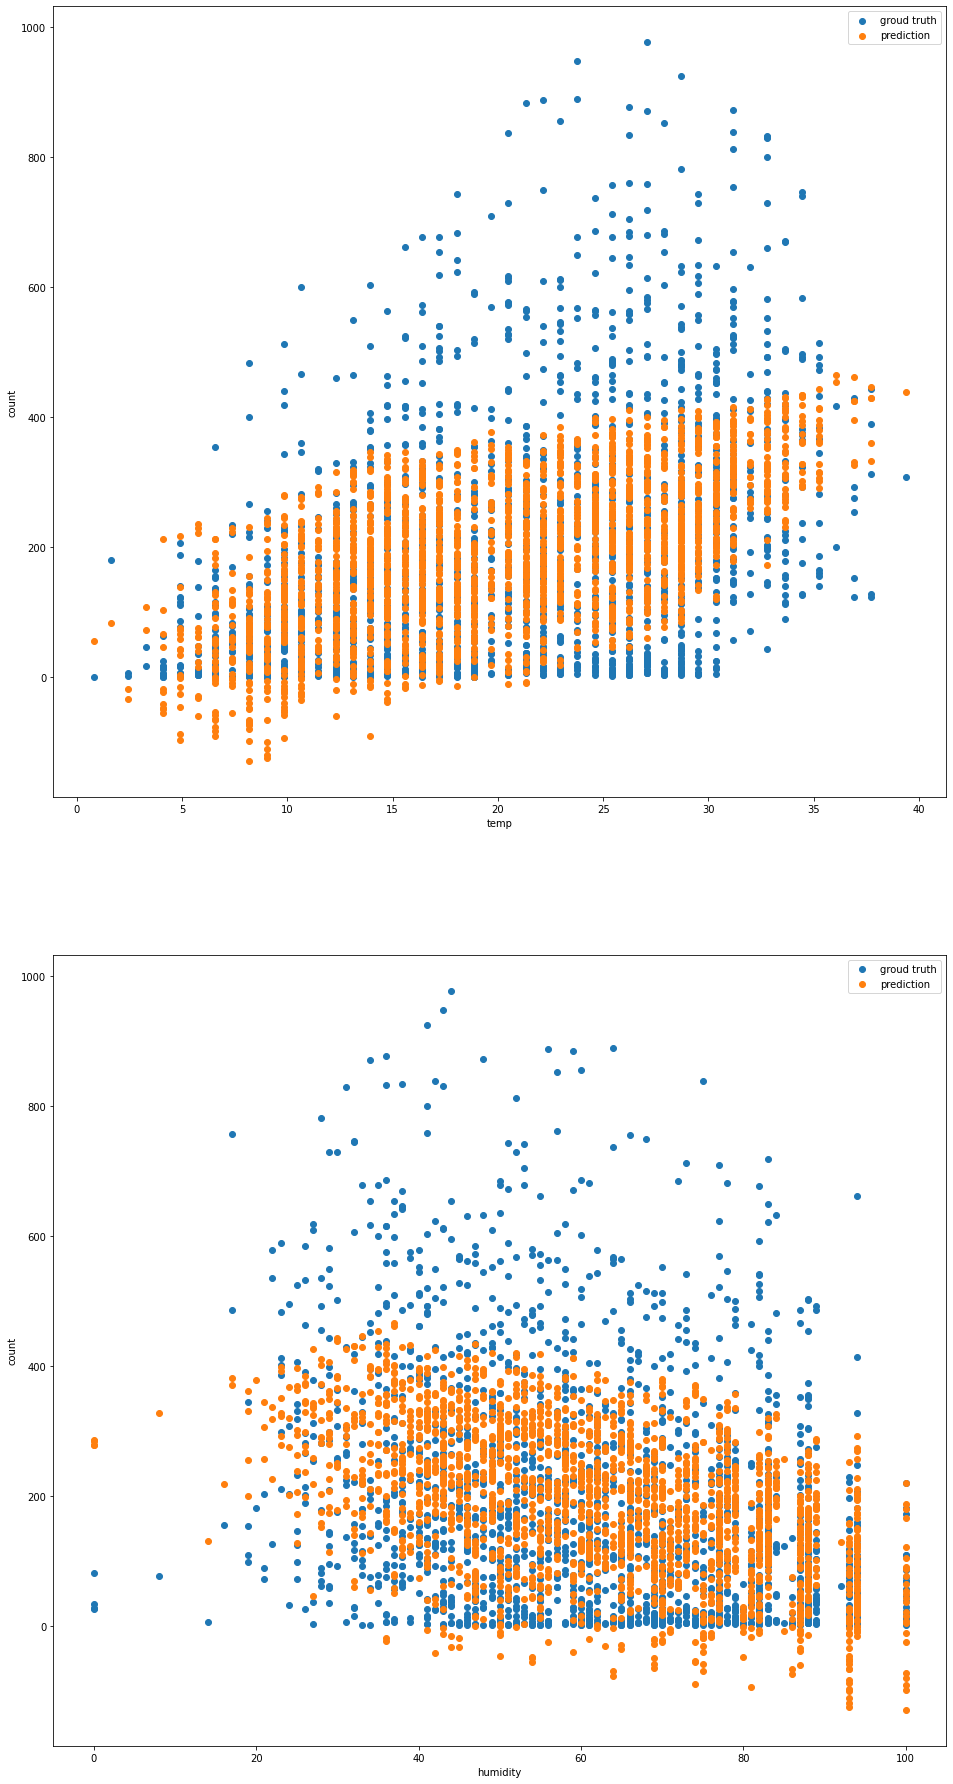

In [14]:
# 전체 이미지 크기 지정
_ = plt.subplots(figsize=(16, 32))

# temp x count 산포도
ax1 = plt.subplot(2, 1, 1)

ax1.scatter(X_test[:,X_cols.index('temp')], y_test)
ax1.scatter(X_test[:,X_cols.index('temp')], y_test_pred)
ax1.legend(['groud truth', 'prediction'])
ax1.set_xlabel('temp')
ax1.set_ylabel('count')

# humidity x count 산포도
ax2 = plt.subplot(2, 1, 2)

ax2.scatter(X_test[:,X_cols.index('humidity')], y_test)
ax2.scatter(X_test[:,X_cols.index('humidity')], y_test_pred)
ax2.legend(['groud truth', 'prediction'])
ax2.set_xlabel('humidity')
ax2.set_ylabel('count')

plt.show()